In [18]:
import os 
from glob import glob

import torch 
from monai.transforms import (
    Compose,
    LoadImaged,
    ToTensord,
    AddChanneld,
)

from monai.data import Dataset, DataLoader
from monai.utils import first
import matplotlib.pyplot as plt

In [19]:
data_dir = '/home/minyoungxi/MINYOUNGXI/MONAI/datasets/Task01_BrainTumour'

In [31]:
# 이미지와 레이블 이름 맞춰서 데이터 정리

train_images = sorted(glob(os.path.join(data_dir, 'TrainData', '*.nii.gz')))
train_labels = sorted(glob(os.path.join(data_dir, 'TrainLabels', '*.nii.gz')))

val_images = sorted(glob(os.path.join(data_dir, 'ValData', '*.nii.gz')))
val_labels = sorted(glob(os.path.join(data_dir, 'ValLabels', '*.nii.gz')))

train_files = [{"image" :image_name, 'label': label_name} for image_name, label_name in zip(train_images, train_labels)]
val_files = [{"image" :image_name, 'label': label_name} for image_name, label_name in zip(val_images, val_labels)]

In [33]:
# load the images 
# do any transforms 
# need to convert them into torch tensors 

train_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image', 'label'])
    ]
    
)

val_transforms = Compose(
    [
        LoadImaged(keys=['image', 'label']),
        AddChanneld(keys=['image', 'label']),
        ToTensord(keys=['image', 'label'])
    ]
    
)

In [34]:
train_ds = Dataset(data=train_files, transform=train_transforms)
train_loader = DataLoader(train_ds, batch_size=1)

val_ds = Dataset(data=val_files, transform=val_transforms)
val_loader = DataLoader(val_ds, batch_size=1)


In [35]:
test_patient = first(train_loader)
print(test_patient)

{'image': metatensor([[[[[[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.]],

           [[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.]],

           [[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.]],

           ...,

           [[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.]],

           [[0., 0., 0., 0.],
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
            ...,
            [0., 0., 0., 0.],
            [0., 0., 0., 0.],
      

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont: Font family 'NanumMyeongjo' not found.
findfont

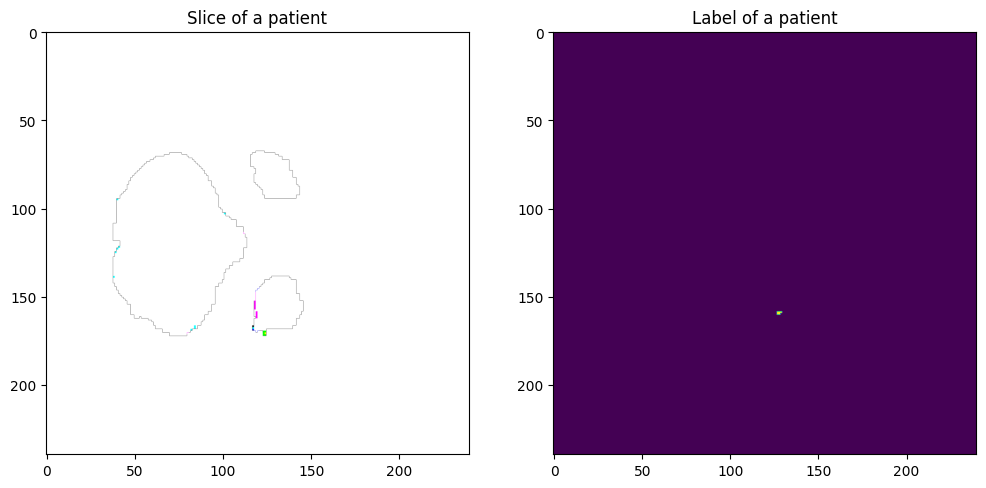

In [39]:
plt.figure('test', (12,6))

plt.subplot(1, 2, 1)
plt.title('Slice of a patient')
plt.imshow(test_patient['image'][0,0, :, :, 30], cmap="gray")

plt.subplot(1,2,2)
plt.title('Label of a patient')
plt.imshow(test_patient['label'][0,0, :, :, 30])

plt.show()